In [1]:
import linecache
import os
import tracemalloc

def display_top(snapshot, key_type='lineno', limit=10):
    snapshot = snapshot.filter_traces((
        tracemalloc.Filter(False, "<frozen importlib._bootstrap>"),
        tracemalloc.Filter(False, "<unknown>"),
    ))
    top_stats = snapshot.statistics(key_type)

    print("Top %s lines" % limit)
    for index, stat in enumerate(top_stats[:limit], 1):
        frame = stat.traceback[0]
        print("#%s: %s:%s: %.1f MB"
              % (index, frame.filename, frame.lineno, stat.size / 1048576))
        line = linecache.getline(frame.filename, frame.lineno).strip()
        if line:
            print('    %s' % line)

    other = top_stats[limit:]
    if other:
        size = sum(stat.size for stat in other)
        print("%s other: %.1f MB" % (len(other), size / 1048576))
    total = sum(stat.size for stat in top_stats)
    print("Total allocated size: %.1f MB" % (total / 1048576))

tracemalloc.start()

In [2]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/abc.py:143: 0.0 MB
    return _abc_subclasscheck(cls, subclass)
#2: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 0.0 MB
    obj, end = self.scan_once(s, idx)
#3: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/zmq/utils/jsonapi.py:43: 0.0 MB
    s = s.encode('utf8')
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/zmq/sugar/socket.py:478: 0.0 MB
    part = self.recv(flags, copy=copy, track=track)
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/traitlets/traitlets.py:536: 0.0 MB
    obj._trait_values[self.name] = value
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/IPython/core/compilerop.py:101: 0.0 MB
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/enum.py:310: 0.0 MB
    return cls.__new__(cls, value)
#8: /home/zhimin90/anaconda3/envs/venv/lib/

In [3]:
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np

previous_30days_date = (pd.datetime.now()- timedelta(days=30)).strftime('%Y-%m-%d')
print(previous_30days_date)
"request_date > \"" + str(previous_30days_date)+"\""

2020-02-24


/home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


'request_date > "2020-02-24"'

In [4]:
CSV_PATH = "/home/zhimin90/CPT/CSVs/"

from sodapy import Socrata

import dill
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from KDEpy import FFTKDE, NaiveKDE

client = Socrata("data.cityofchicago.org", None)
results = client.get("wqdh-9gek",order="request_date DESC",where="request_date > \"" + str(previous_30days_date)+"\"", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [5]:
# ... run your application ...
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: <frozen importlib._bootstrap_external>:525: 23.4 MB
#2: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 3.8 MB
    obj, end = self.scan_once(s, idx)
#3: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/linecache.py:137: 0.8 MB
    lines = fp.readlines()
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/_lib/doccer.py:68: 0.5 MB
    return docstring % indented
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:690: 0.3 MB
    exec_(parse_arg_template % dct, ns)
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/overrides.py:181: 0.3 MB
    source, filename='<__array_function__ internals>', mode='exec')
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/re.py:192: 0.3 MB
    return _compile(pattern, flags).sub(repl, string, count)
#8: <frozen importlib._bootstrap_external>:59: 0.2 MB
#9: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/functools.

In [6]:
test_df = results_df
test_df.columns = pd.Series(test_df.columns).apply(lambda x: x.upper()).values
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)
test_df = test_df[test_df.LATITUDE.notna()].sort_values(['REQUEST_DATE','COMPLETION_DATE'], ascending=[0,0])
test_df['REQUEST_DATE'] = pd.to_datetime(test_df['REQUEST_DATE'])
test_df['COMPLETION_DATE'] = pd.to_datetime(test_df['COMPLETION_DATE'])
test_df['LATITUDE'] = pd.to_numeric(test_df['LATITUDE'])
test_df['LONGITUDE'] = pd.to_numeric(test_df['LONGITUDE'])
df = test_df

In [7]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: <frozen importlib._bootstrap_external>:525: 23.4 MB
#2: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 3.8 MB
    obj, end = self.scan_once(s, idx)
#3: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/linecache.py:137: 1.3 MB
    lines = fp.readlines()
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/_lib/doccer.py:68: 0.5 MB
    return docstring % indented
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:690: 0.3 MB
    exec_(parse_arg_template % dct, ns)
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/overrides.py:181: 0.3 MB
    source, filename='<__array_function__ internals>', mode='exec')
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/re.py:192: 0.3 MB
    return _compile(pattern, flags).sub(repl, string, count)
#8: <frozen importlib._bootstrap_external>:59: 0.2 MB
#9: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/functools.

In [8]:
map_arr = []
interval_int = 30 #use 30 days data to predict next 7 days
series_range = 7 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['REQUEST_DATE'])
date_end = max(df['REQUEST_DATE'])

geo_price_map = df[['REQUEST_DATE', 'COMPLETION_DATE','LATITUDE', 'LONGITUDE']]

In [9]:
filter1a = pd.to_numeric(geo_price_map["LONGITUDE"]) > xbound[0]
filter1b = pd.to_numeric(geo_price_map["LONGITUDE"]) < xbound[1]
filter1c = pd.to_numeric(geo_price_map["LATITUDE"]) > ybound[0]
filter1d = pd.to_numeric(geo_price_map["LATITUDE"]) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 3358


In [10]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: <frozen importlib._bootstrap_external>:525: 23.4 MB
#2: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 3.8 MB
    obj, end = self.scan_once(s, idx)
#3: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/linecache.py:137: 1.3 MB
    lines = fp.readlines()
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/_lib/doccer.py:68: 0.5 MB
    return docstring % indented
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/tracemalloc.py:65: 0.3 MB
    return (self.size, self.count, self.traceback)
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:690: 0.3 MB
    exec_(parse_arg_template % dct, ns)
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/overrides.py:181: 0.3 MB
    source, filename='<__array_function__ internals>', mode='exec')
#8: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/re.py:192: 0.3 MB
    return _compile(pattern, flags).sub(repl, st

In [11]:
for int_cur_date in range(0, 7, int(series_range)):
    geo_price_map_filtered = geo_price_map[geo_price_map['LONGITUDE'].notnull()]
    
    filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("pothole count: " + str(len(geo_price_map_filtered.notnull().index)))
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

2020-02-22 14:59:13
2020-03-23 14:59:13
pothole count: 3358
____________________


In [12]:
map_arr.reverse()
pothole_count = []
for df in map_arr:
    pothole_count.append(df.count())

In [13]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: <frozen importlib._bootstrap_external>:525: 23.4 MB
#2: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 3.8 MB
    obj, end = self.scan_once(s, idx)
#3: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/linecache.py:137: 1.3 MB
    lines = fp.readlines()
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/_lib/doccer.py:68: 0.5 MB
    return docstring % indented
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/tracemalloc.py:65: 0.3 MB
    return (self.size, self.count, self.traceback)
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:690: 0.3 MB
    exec_(parse_arg_template % dct, ns)
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/overrides.py:181: 0.3 MB
    source, filename='<__array_function__ internals>', mode='exec')
#8: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/re.py:192: 0.3 MB
    return _compile(pattern, flags).sub(repl, st

In [14]:
def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [15]:
grid_size = 1000
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [16]:
map_arr[-1].shape

(3358, 4)

In [17]:
for i, df in enumerate(map_arr):
    if df["LONGITUDE"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))

@0


In [18]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: <frozen importlib._bootstrap_external>:525: 23.4 MB
#2: <__array_function__ internals>:6: 15.3 MB
#3: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/numeric.py:1713: 15.3 MB
    res = empty((N,)+dimensions, dtype=dtype)
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/KDEpy/BaseKDE.py:212: 7.6 MB
    evaluated = evaluated.ravel() + np.finfo(float).eps
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 3.8 MB
    obj, end = self.scan_once(s, idx)
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/linecache.py:137: 1.3 MB
    lines = fp.readlines()
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/_lib/doccer.py:68: 0.5 MB
    return docstring % indented
#8: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/tracemalloc.py:65: 0.3 MB
    return (self.size, self.count, self.traceback)
#9: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructur

In [19]:
s = round(len(density_matrix_t_series)*0)

In [20]:
f_in = open(CSV_PATH +'Scalers_2020.pkl', "rb")
scaler,scaler2 = dill.load(f_in)
f_in.close()

dm_series_np = np.array(density_matrix_t_series[s:])
flattened_matrix_np = np.reshape(dm_series_np, (dm_series_np.shape[0]*dm_series_np.shape[1], dm_series_np.shape[2]))

normalized_matrices_test = scaler2.transform(scaler.transform(flattened_matrix_np))
y_test2 = normalized_matrices_test

In [21]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: <frozen importlib._bootstrap_external>:525: 23.4 MB
#2: <__array_function__ internals>:6: 15.3 MB
#3: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/numeric.py:1713: 15.3 MB
    res = empty((N,)+dimensions, dtype=dtype)
#4: <ipython-input-20-3ec23eaf0a17>:5: 7.6 MB
    dm_series_np = np.array(density_matrix_t_series[s:])
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:602: 7.6 MB
    array = np.array(array, dtype=dtype, order=order)
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/KDEpy/BaseKDE.py:212: 7.6 MB
    evaluated = evaluated.ravel() + np.finfo(float).eps
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 3.8 MB
    obj, end = self.scan_once(s, idx)
#8: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/linecache.py:137: 1.5 MB
    lines = fp.readlines()
#9: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/_lib/doccer.py:68: 0.5 

In [22]:
import tensorflow.keras as keras
with open(CSV_PATH + 'TensorFlowModel_2020_train_save_model_config.json') as json_file:
        json_config = json_file.read()
model = keras.models.model_from_json(json_config)
model.load_weights(CSV_PATH + 'TensorFlowModel_2020_train_save_my_weights.h5')

In [23]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/h5py/_hl/dataset.py:766: 99.6 MB
    arr = numpy.empty(self.shape, dtype=self.dtype if dtype is None else dtype)
#2: <frozen importlib._bootstrap_external>:525: 55.0 MB
#3: <__array_function__ internals>:6: 15.3 MB
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/numeric.py:1713: 15.3 MB
    res = empty((N,)+dimensions, dtype=dtype)
#5: <ipython-input-20-3ec23eaf0a17>:5: 7.6 MB
    dm_series_np = np.array(density_matrix_t_series[s:])
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:602: 7.6 MB
    array = np.array(array, dtype=dtype, order=order)
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/KDEpy/BaseKDE.py:212: 7.6 MB
    evaluated = evaluated.ravel() + np.finfo(float).eps
#8: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 3.8 MB
    obj, end = self.scan_once(s, idx)
#9: /home/zhimin90/an

In [24]:
Last_time_frame = y_test2

In [25]:
pred = model.predict(np.reshape(Last_time_frame,(Last_time_frame.shape[0],1,Last_time_frame.shape[1])))
data = scaler.inverse_transform(scaler2.inverse_transform(pred))
data_reshaped = data.reshape((int(data.shape[0]/data.shape[1]), data.shape[1], data.shape[1]))
print(data_reshaped.shape)

(1, 1000, 1000)


In [26]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/h5py/_hl/dataset.py:766: 99.6 MB
    arr = numpy.empty(self.shape, dtype=self.dtype if dtype is None else dtype)
#2: <frozen importlib._bootstrap_external>:525: 55.0 MB
#3: <__array_function__ internals>:6: 15.3 MB
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/numeric.py:1713: 15.3 MB
    res = empty((N,)+dimensions, dtype=dtype)
#5: <ipython-input-20-3ec23eaf0a17>:5: 7.6 MB
    dm_series_np = np.array(density_matrix_t_series[s:])
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:602: 7.6 MB
    array = np.array(array, dtype=dtype, order=order)
#7: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/KDEpy/BaseKDE.py:212: 7.6 MB
    evaluated = evaluated.ravel() + np.finfo(float).eps
#8: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/json/decoder.py:353: 3.8 MB
    obj, end = self.scan_once(s, idx)
#9: /home/zhimin90/an

In [27]:
start_frame_date = min(map_arr[-1]['REQUEST_DATE'][map_arr[-1]['REQUEST_DATE'].notna()])
end_frame_date = max(map_arr[-1]['REQUEST_DATE'][map_arr[-1]['REQUEST_DATE'].notna()])
time_shift = 7 #days

In [28]:
offset = yy.shape[0]
print("offset = yy.shape[0]" + str(offset))
xx = xx.ravel()
yy = yy.ravel()
xdelta = abs(xx[1] - xx[1+offset])
ydelta = abs(yy[0] - yy[1+offset])
print("xdelta"+str(xdelta))
print("ydelta"+str(ydelta))
columns = [ 'start_date', 'end_date', 'poly_coordinate', 'density']

offset = yy.shape[0]1000
xdelta0.0004944144144189977
ydelta0.0004544144144134066


In [29]:
import rasterio
import pprint

In [30]:
min(xx), min(yy), max(xx), max(yy)

(-87.97726, 41.60687, -87.48334, 42.06083)

In [32]:
from rasterio.transform import Affine

res = (xx[-1] - xx[0]) / 1000.0

In [33]:
from shapely.geometry import shape
from shapely.geometry import Polygon

In [62]:
Matrix = np.rot90(np.flip(data_reshaped[0],1))
max_density = np.max(Matrix)
min_density = np.min(Matrix)
Matrix = ((Matrix-min_density).astype(int)*25/(max_density - min_density)).astype('int32')
Z = Matrix*10

In [63]:
transform = rasterio.transform.from_bounds(min(xx), max(yy), max(xx), min(yy), Z.shape[1], Z.shape[0])
transform

Affine(0.0004939200000000028, 0.0, -87.97726,
       0.0, 0.00045396000000000217, 41.60687)

In [64]:
from rasterio import features

results = ({'properties': {'raster_val': v}, 'geometry': s,'start_date':pd.to_datetime(start_frame_date) + timedelta(days=(time_shift*(1))),'end_date':pd.to_datetime(end_frame_date) + timedelta(days=(time_shift*(1)))}
        for i, (s, v)
        in enumerate(rasterio.features.shapes(Z,transform=transform)))

In [65]:
geoms = list(results)

In [66]:
geoms[0]

{'properties': {'raster_val': 30.0},
 'geometry': {'type': 'Polygon',
  'coordinates': [[(-87.7228912, 41.64863432),
    (-87.7228912, 41.64908828),
    (-87.71943376, 41.64908828),
    (-87.71943376, 41.64863432),
    (-87.7228912, 41.64863432)]]},
 'start_date': Timestamp('2020-03-02 01:42:18'),
 'end_date': Timestamp('2020-03-30 14:59:13')}

In [67]:
import geopandas as gp
gpd_polygonized_raster  = gp.GeoDataFrame.from_features(geoms)

In [68]:
gpd_polygonized_raster

,geometry,raster_val
0,"POLYGON ((-87.72289 41.64863, -87.72289 41.649...",30.0
1,"POLYGON ((-87.71499 41.64863, -87.71499 41.649...",30.0
2,"POLYGON ((-87.69079 41.64863, -87.69079 41.649...",30.0
3,"POLYGON ((-87.69029 41.65000, -87.69029 41.650...",30.0
4,"POLYGON ((-87.68041 41.65000, -87.68041 41.650...",30.0
...,...,...
7400,"POLYGON ((-87.80735 42.02134, -87.80735 42.021...",30.0
7401,"POLYGON ((-87.69968 42.02134, -87.69968 42.021...",30.0
7402,"POLYGON ((-87.68634 42.02134, -87.68634 42.021...",30.0
7403,"POLYGON ((-87.67449 42.02134, -87.67449 42.021...",30.0


In [69]:
#gpd_polygonized_raster[["geometry","raster_val"]].plot(column='raster_val',figsize=(10,10))

In [70]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/h5py/_hl/dataset.py:766: 99.6 MB
    arr = numpy.empty(self.shape, dtype=self.dtype if dtype is None else dtype)
#2: <frozen importlib._bootstrap_external>:525: 62.8 MB
#3: <__array_function__ internals>:6: 26.1 MB
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/rasterio/features.py:127: 19.1 MB
    for s, v in _shapes(source, mask, connectivity, transform):
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/numeric.py:1713: 15.3 MB
    res = empty((N,)+dimensions, dtype=dtype)
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/shapely/geometry/base.py:230: 9.5 MB
    self._is_empty = True
#7: <ipython-input-20-3ec23eaf0a17>:5: 7.6 MB
    dm_series_np = np.array(density_matrix_t_series[s:])
#8: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:602: 7.6 MB
    array = np.array(array, dtype=dtype, order=orde

In [71]:
gpd_polygonized_raster["geometry"] = gpd_polygonized_raster["geometry"].simplify(0)

In [72]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

Top 10 lines
#1: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/h5py/_hl/dataset.py:766: 99.6 MB
    arr = numpy.empty(self.shape, dtype=self.dtype if dtype is None else dtype)
#2: <frozen importlib._bootstrap_external>:525: 62.8 MB
#3: <__array_function__ internals>:6: 26.1 MB
#4: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/rasterio/features.py:127: 19.1 MB
    for s, v in _shapes(source, mask, connectivity, transform):
#5: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/numeric.py:1713: 15.3 MB
    res = empty((N,)+dimensions, dtype=dtype)
#6: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/shapely/geometry/base.py:230: 9.6 MB
    self._is_empty = True
#7: <ipython-input-20-3ec23eaf0a17>:5: 7.6 MB
    dm_series_np = np.array(density_matrix_t_series[s:])
#8: /home/zhimin90/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:602: 7.6 MB
    array = np.array(array, dtype=dtype, order=orde

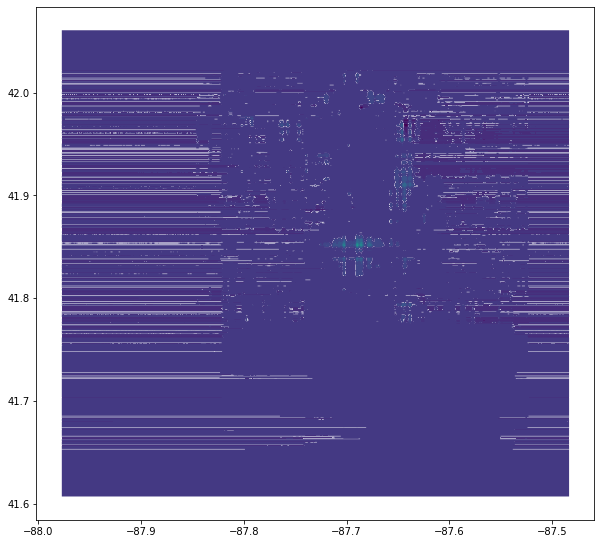

In [73]:
gpd_polygonized_raster[["geometry","raster_val"]].plot(column='raster_val',figsize=(10,10))

In [74]:
gpd_polygonized_raster['raster_val'].describe()

count    7405.000000
mean       59.390952
std        34.112886
min         0.000000
25%        30.000000
50%        50.000000
75%        80.000000
max       240.000000
Name: raster_val, dtype: float64

In [75]:
gpd_polygonized_raster['start_date'] = pd.to_datetime(start_frame_date) + timedelta(days=(time_shift*(1)))
gpd_polygonized_raster['end_date'] = pd.to_datetime(end_frame_date) + timedelta(days=(time_shift*(1)))
gpd_polygonized_raster

,geometry,raster_val,start_date,end_date
0,"POLYGON ((-87.72289 41.64863, -87.72289 41.649...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
1,"POLYGON ((-87.71499 41.64863, -87.71499 41.649...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
2,"POLYGON ((-87.69079 41.64863, -87.69079 41.649...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
3,"POLYGON ((-87.69029 41.65000, -87.69029 41.650...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
4,"POLYGON ((-87.68041 41.65000, -87.68041 41.650...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
...,...,...,...,...
7400,"POLYGON ((-87.80735 42.02134, -87.80735 42.021...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
7401,"POLYGON ((-87.69968 42.02134, -87.69968 42.021...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
7402,"POLYGON ((-87.68634 42.02134, -87.68634 42.021...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
7403,"POLYGON ((-87.67449 42.02134, -87.67449 42.021...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13


In [76]:
gpd_polygonized_raster.rename(columns={'raster_val': 'density'}, inplace=True)
gpd_polygonized_raster

,geometry,density,start_date,end_date
0,"POLYGON ((-87.72289 41.64863, -87.72289 41.649...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
1,"POLYGON ((-87.71499 41.64863, -87.71499 41.649...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
2,"POLYGON ((-87.69079 41.64863, -87.69079 41.649...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
3,"POLYGON ((-87.69029 41.65000, -87.69029 41.650...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
4,"POLYGON ((-87.68041 41.65000, -87.68041 41.650...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
...,...,...,...,...
7400,"POLYGON ((-87.80735 42.02134, -87.80735 42.021...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
7401,"POLYGON ((-87.69968 42.02134, -87.69968 42.021...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
7402,"POLYGON ((-87.68634 42.02134, -87.68634 42.021...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13
7403,"POLYGON ((-87.67449 42.02134, -87.67449 42.021...",30.0,2020-03-02 01:42:18,2020-03-30 14:59:13


In [77]:
import dill
f = open(CSV_PATH +'gdf_dissolved_2020.pkl', "wb")
dill.dump(gpd_polygonized_raster, file=f)
f.close()